In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df.sample(n=8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20102,36,management,single,tertiary,no,553,no,no,cellular,11,aug,106,2,-1,0,unknown,no
29949,34,admin.,married,secondary,no,1651,no,no,cellular,4,feb,246,1,-1,0,unknown,no
19148,51,blue-collar,married,secondary,no,2918,no,no,cellular,5,aug,193,2,-1,0,unknown,no
16337,27,blue-collar,married,secondary,no,197,no,no,telephone,23,jul,222,1,-1,0,unknown,no
21253,58,management,married,secondary,no,37,no,no,cellular,18,aug,84,11,-1,0,unknown,no
35970,51,blue-collar,married,secondary,no,1022,yes,no,cellular,8,may,311,3,-1,0,unknown,no
44214,37,management,married,tertiary,no,0,no,no,cellular,16,jul,268,2,182,3,success,yes
42182,27,services,single,secondary,no,6279,yes,no,cellular,9,nov,257,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

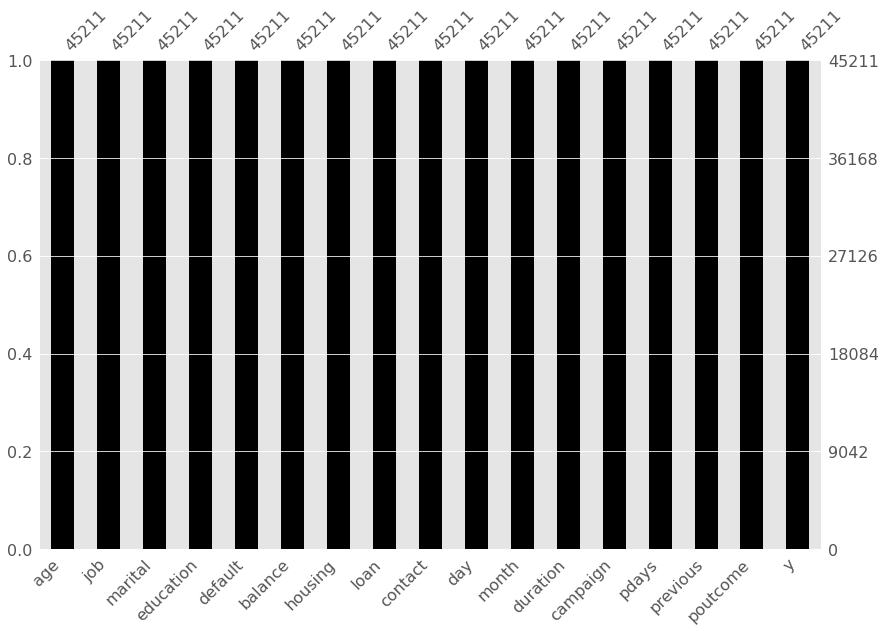

In [4]:
msno.bar(df, figsize=(14,9), color='k')

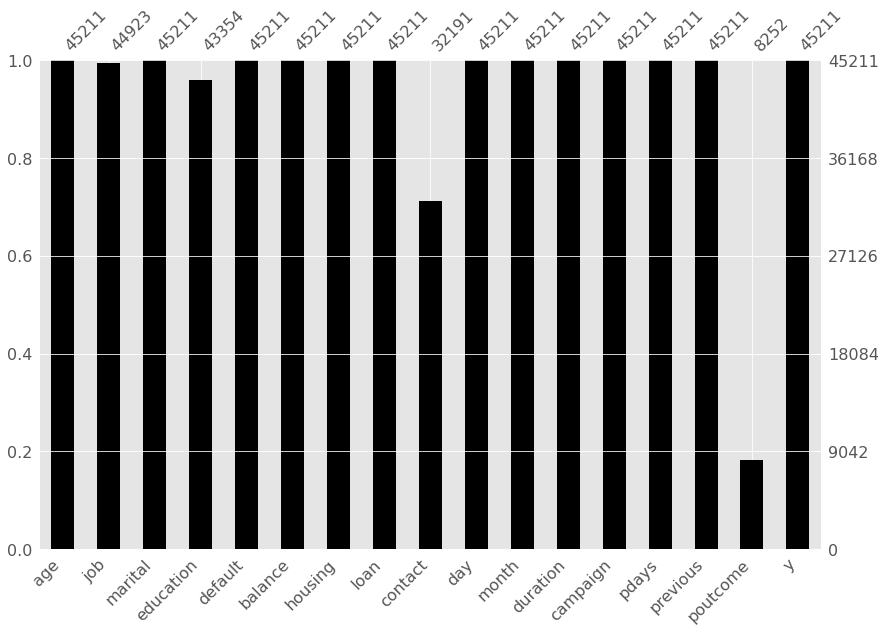

In [5]:
df.replace('unknown', np.NaN, inplace=True)
msno.bar(df, figsize=(14,9), color='k')

In [6]:
df.isna().mean() * 100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

In [7]:
df.to_csv('bank-full-dataset.csv')

In [8]:
data, target = df.drop(columns=['y']), df.y

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [10]:
num_features = data.select_dtypes(include='number').columns.tolist()
cat_features = data.select_dtypes(include='object').columns.tolist()
print(num_features)
print(cat_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


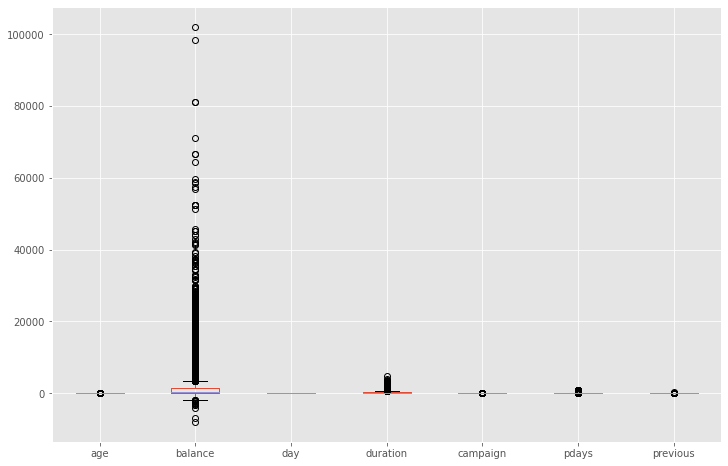

In [11]:
data[num_features].boxplot(figsize=(12,8))

In [12]:
from scipy.stats import zscore


data[num_features] = data[num_features].apply(zscore)
data[num_features] = pd.DataFrame(data, columns=num_features)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,management,married,tertiary,no,0.256419,yes,no,NaN,-1.298476,may,0.011016,-0.569351,-0.411453,-0.25194,NaN
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,NaN,-1.298476,may,-0.416127,-0.569351,-0.411453,-0.25194,NaN
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,NaN,-1.298476,may,-0.707361,-0.569351,-0.411453,-0.25194,NaN
3,0.571051,blue-collar,married,NaN,no,0.047205,yes,no,NaN,-1.298476,may,-0.645231,-0.569351,-0.411453,-0.25194,NaN
4,-0.747384,NaN,single,NaN,no,-0.447091,no,no,NaN,-1.298476,may,-0.233620,-0.569351,-0.411453,-0.25194,NaN


In [13]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(
    data, target,
    test_size=.1,
    random_state=42,
    stratify=target,
)

X_train, X_dev, y_train, y_dev = train_test_split(
    X,y,
    test_size=X_test.shape[0]/X.shape[0],
    random_state=42,
    stratify=y,
)

(
    X_train.shape, y_train.shape,
    X_dev.shape, y_dev.shape,
    X_test.shape, y_test.shape
 )

((36167, 16), (36167,), (4522, 16), (4522,), (4522, 16), (4522,))

In [14]:
!pip install category_encoders --quiet

In [15]:
X_train[cat_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome
1845,services,married,NaN,no,yes,no,NaN,may,NaN
9646,management,married,tertiary,no,yes,no,NaN,jun,NaN
39344,technician,single,secondary,no,yes,no,telephone,may,NaN
36375,technician,married,secondary,no,yes,no,cellular,may,failure
8179,blue-collar,married,secondary,no,yes,no,NaN,jun,NaN


In [16]:
import category_encoders as ce

# create instance of binary encoding
ce_binary = ce.BinaryEncoder(X_train[cat_features])

# fit and transform to get encoded cat
bin_train = ce_binary.fit_transform(X_train[cat_features])
bin_dev = ce_binary.transform(X_dev[cat_features])
bin_test = ce_binary.transform(X_test[cat_features])

In [17]:
bin_test.head()

,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,default_0,...,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,poutcome_0,poutcome_1,poutcome_2
4008,1,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
1191,0,1,1,0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
3432,0,0,1,0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
30891,0,0,1,0,1,0,0,1,0,0,...,1,1,1,1,0,1,0,0,0,1
20337,1,0,1,0,0,1,0,1,1,0,...,1,1,1,0,1,1,1,0,0,1


In [18]:
X_train = pd.concat([X_train.drop(columns=cat_features), bin_train], axis=1)
X_dev = pd.concat([X_dev.drop(columns=cat_features), bin_dev], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_features), bin_test], axis=1)

In [19]:
X_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_0,job_1,job_2,...,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,poutcome_0,poutcome_1,poutcome_2
4008,1.324443,-0.447419,0.023260,0.585718,0.076230,-0.411453,-0.25194,1,1,0,...,1,0,1,0,0,0,1,0,0,1
1191,0.006007,-0.583063,-0.938003,-0.342348,-0.246560,-0.411453,-0.25194,0,1,1,...,1,0,1,0,0,0,1,0,0,1
3432,1.606965,-0.333452,-0.096898,1.036159,-0.569351,-0.411453,-0.25194,0,0,1,...,1,0,1,0,0,0,1,0,0,1
30891,-1.312428,-0.343305,-0.817845,-0.773374,0.076230,-0.411453,-0.25194,0,0,1,...,1,1,1,1,0,1,0,0,0,1
20337,-0.841558,0.811148,-0.577529,-0.691828,0.076230,-0.411453,-0.25194,1,0,1,...,1,1,1,0,1,1,1,0,0,1


In [20]:
X_test.isna().sum().sum()

0

In [21]:
X_train.to_csv('x_train.csv')
X_dev.to_csv('x_dev.csv')
X_test.to_csv('x_test.csv')